In [71]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
import arabic_reshaper
from bidi.algorithm import get_display

In [72]:

# Load and preprocess Excel sheet
xls = pd.ExcelFile(r'C:\Users\marii\Downloads\studentcourses.xlsx')

all_sheets = [] #list to store  data from all sheets
columns_mapping = { # rename columns
  
    'Unnamed: 0': 'empty',
     'م': 'empty',

    'Unnamed: 1': 'StudentID',
    'رقم الطالب': 'StudentID',

    'Unnamed: 2': 'StudentName',
    'اسم الطالب': 'StudentName',

    'Unnamed: 3': 'Specialization',
    'التخصص': 'Specialization',

    'Unnamed: 4': 'CourseNumber',
    'رقم المقرر': 'CourseNumber',

    'Unnamed: 5': 'CourseName',
    'اسم المقرر': 'CourseName',

    'Unnamed: 6': 'CourseCode',
    'رمز المقرر': 'CourseCode',

    'Unnamed: 7': 'Department number',
    'رقم الشعبة': 'Department number'

}
required_columns = ['StudentID', 'StudentName', 'Specialization', 'CourseNumber', 'CourseName', 'CourseCode', 'Department number']

for sheet in xls.sheet_names:
    temp_df = pd.read_excel(xls, sheet_name=sheet)
    temp_df.rename(columns=columns_mapping, inplace=True)
    temp_df = temp_df[required_columns]
    all_sheets.append(temp_df) #It adds a new item to the end of the list.

df = pd.concat(all_sheets, ignore_index=True)  #dfبنجمع كل الجداول اللي في all_sheets في جدول واحد كبير اسمه .concat =Combine multiple DataFrames into one.
print(df.head)
print(df.shape)

<bound method NDFrame.head of         StudentID                     StudentName    Specialization  \
0      1105312002  عبدالمجيد علي عبدالرحمن الشاوي  السجلات الطبية-2   
1      1105311013          سالم سليمان دهش الشمري  السجلات الطبية-2   
2      1105312004        احمد عبدالله صالح الحربي  السجلات الطبية-2   
3      1105321021      يوسف عبدالله سليمان المهوس  السجلات الطبية-2   
4      1105312011          سطام بندر جايز المطيري  السجلات الطبية-2   
...           ...                             ...               ...   
14786  1501311010    أحمد عبدالعزيز محمد العبيدان      هندسة الحاسب   
14787  1401321075           صالح محمد صالح الرميح       علوم الحاسب   
14788  1502301005           يزيد محمد صالح الهجرس       علوم حاسب-1   
14789  1502312010     محمد عبدالله محيميد العريني       علوم الحاسب   
14790  1502312003          صالح أحمد صالح المعتاز       علوم الحاسب   

      CourseNumber        CourseName CourseCode Department number  
0           110501  المهارات اللغوية   ARAB 101  

In [73]:
#chect if  اسم المقرر in the course name
if 'اسم المقرر' in df['CourseName'].values:
  df = df[df['CourseName'] != 'اسم المقرر']
else:
    print("not found")

print(df['CourseName'].unique())
print(df['CourseName'].nunique())

['المهارات اللغوية' 'التحرير العربي' 'Biology'
 'النظام الإقتصادي في الإسلام' 'English Language 2' 'General Physics'
 'Health Care Planning' 'Health Information Management II'
 'Health Information Technology' 'Health Insurance Reimbursement'
 'Healthcare Informatics' 'HIM Clinical Education II'
 'Humman Recource Management' 'Introduction to Chemistry'
 'Introduction to Economic' 'الإسلام وبناء المجتمع'
 'IT Project Management' 'Management of Healthcare Organization'
 'Medical Transcription' 'Pathophysiology'
 'Principles of Financial Accounting'
 'Seminar in Health Information Administration'
 'الاتصالات في الرعاية الصحية الأولية'
 'الاختلافات الاجتماعية الثقافية المتعلقة بالصحة' 'الإحصاء الحيوي'
 'الأمراض المعدية' 'التثقيف الغذائي وارشاد الرضى'
 'التمارين الحركية الاكلنكية' 'التمريض الطبي الجراحي'
 'التمريض والرعاية الصحية' 'السلوك الانساني'
 'العادات الغذائية والمفاهيم لااجتماعية' 'الفيزياء للتمريض' 'القياس الصحي'
 'الكيمياء الحيوية الغذائية' 'الكيمياء للتمريض'
 'اللغة الانجليزية للأ

In [74]:
print(df.duplicated().any)

<bound method Series.any of 0        False
1        False
2        False
3        False
4        False
         ...  
14786    False
14787    False
14788    False
14789    False
14790    False
Length: 14505, dtype: bool>


In [75]:
print(df.isnull().sum())

StudentID            3402
StudentName          3402
Specialization       3402
CourseNumber         3402
CourseName           3402
CourseCode           3402
Department number    3402
dtype: int64


In [76]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)
df.dropna(how='all', inplace=True) #how='all': This specifies that rows should be dropped only if all the values in the row are NaN. If you want to drop rows that have any NaN values, you would use how='any'.

#inplace=True: This modifies the original DataFrame directly, meaning the operation is done in-place and doesn't require assignment to a new variable.
print(df.isnull().sum())
print(df.shape)

      StudentID StudentName Specialization CourseNumber CourseName CourseCode  \
3776        NaN         NaN            NaN          NaN        NaN        NaN   
3777        NaN         NaN            NaN          NaN        NaN        NaN   
3778        NaN         NaN            NaN          NaN        NaN        NaN   
3779        NaN         NaN            NaN          NaN        NaN        NaN   
3780        NaN         NaN            NaN          NaN        NaN        NaN   
...         ...         ...            ...          ...        ...        ...   
12590       NaN         NaN            NaN          NaN        NaN        NaN   
12591       NaN         NaN            NaN          NaN        NaN        NaN   
12592       NaN         NaN            NaN          NaN        NaN        NaN   
12593       NaN         NaN            NaN          NaN        NaN        NaN   
12594       NaN         NaN            NaN          NaN        NaN        NaN   

      Department number  
3

In [77]:
#number of students per course
course_counts = df.groupby('CourseName')['StudentID'].nunique().reset_index()
course_counts.columns= ["Course Name", "Num_Students"] 
print(course_counts)


                   Course Name  Num_Students
0             APPLIED GRAMMAR2             6
1                      Biology             1
2    CONSECUTIVE INTERPRETING2             2
3           English Language 2             3
4                     GRAMMAR2             1
..                         ...           ...
456                نظم التشغيل             7
457     نظم المعلومات الإدارية            53
458    نظم المعلومات المحاسبية            12
459            هندسة البرمجيات            23
460         هندسة الجهد العالي             8

[461 rows x 2 columns]


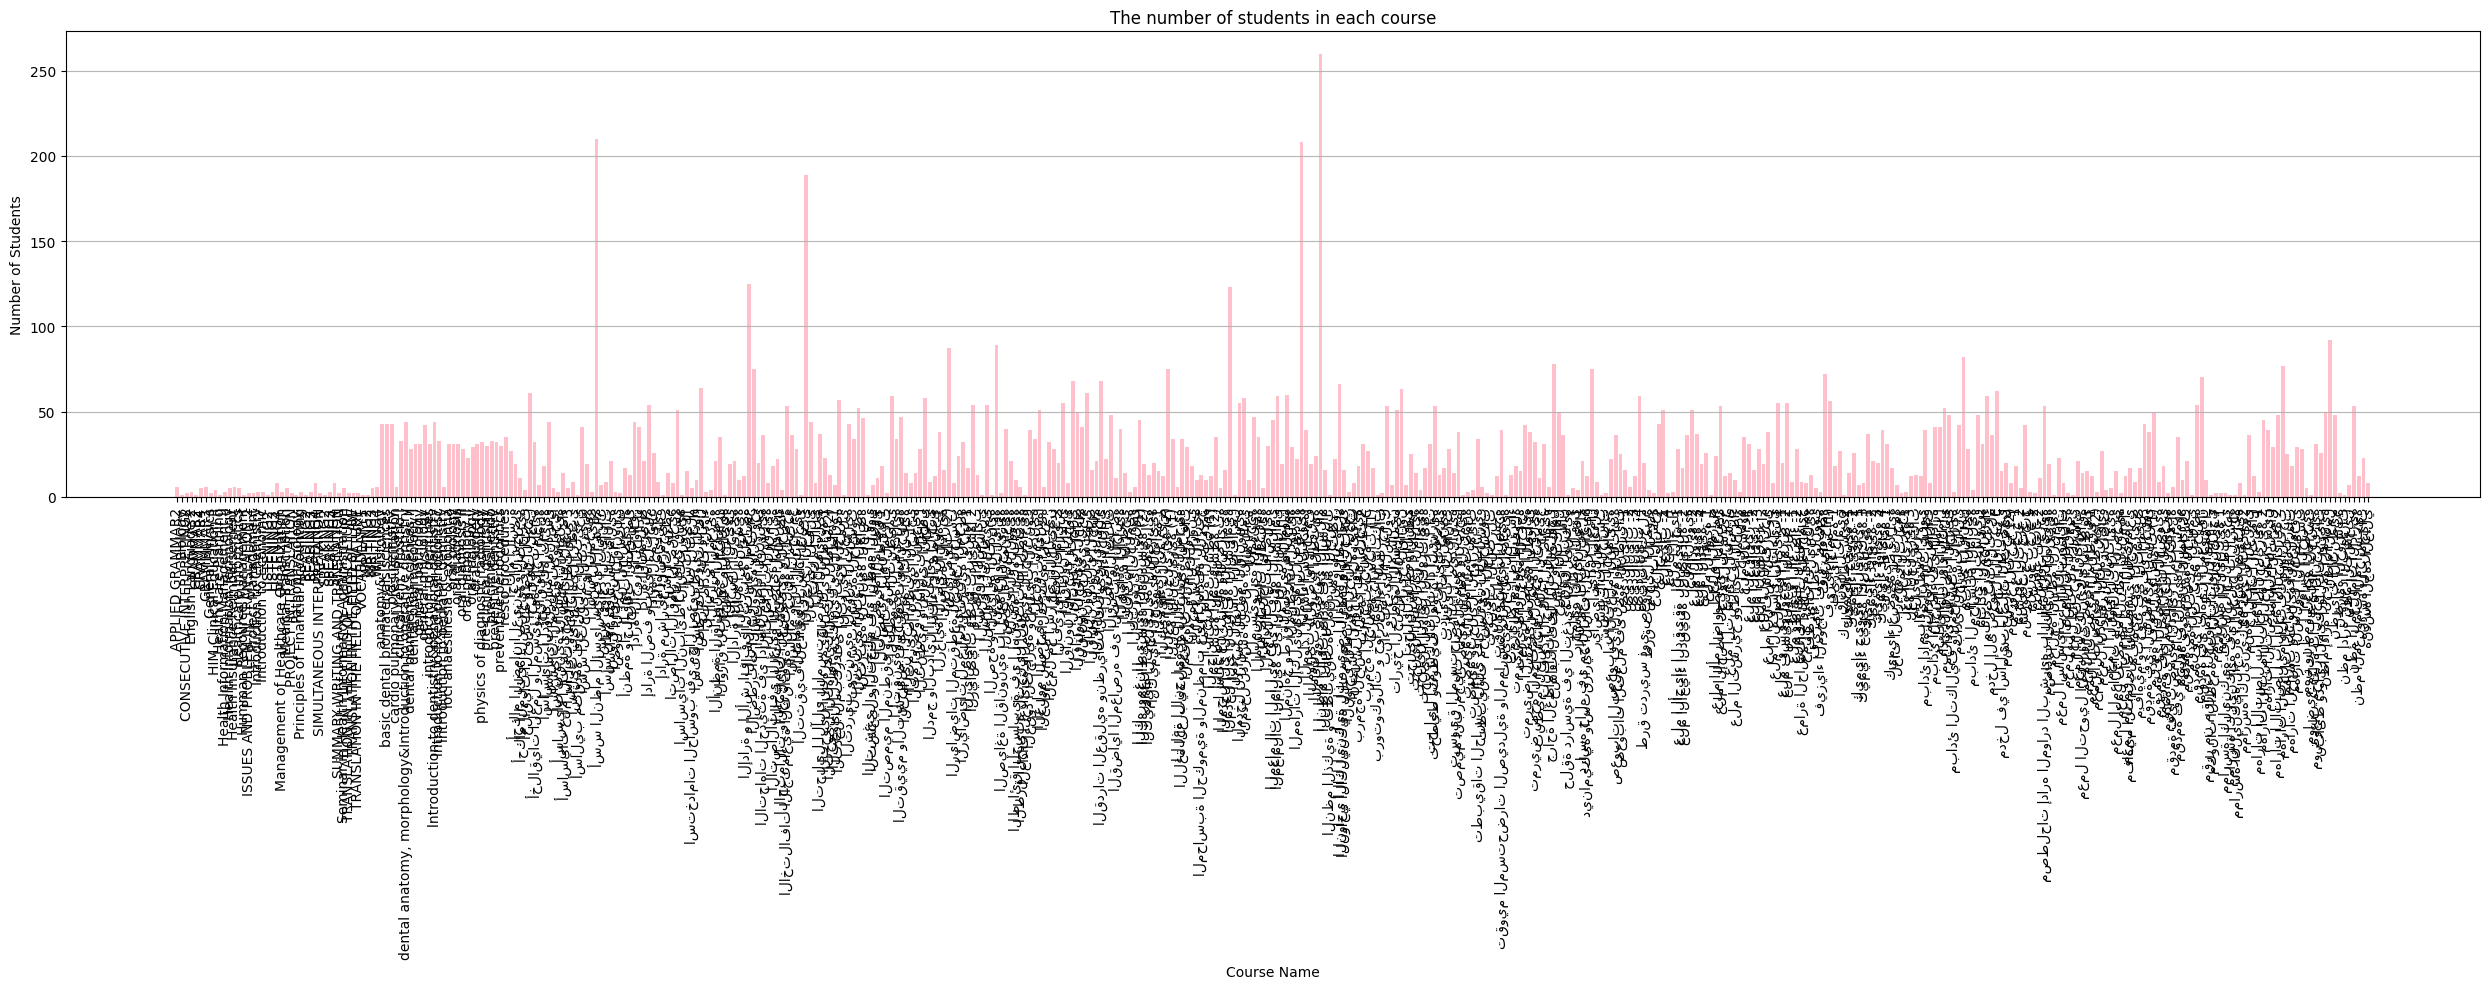

In [78]:
#Visualize the number of students per course
plt.figure(figsize=(25,10)) 
plt.bar(course_counts["Course Name"],course_counts["Num_Students"], color='pink' ) 
 
plt.xticks(rotation=90)   
plt.xlabel("Course Name") 
plt.ylabel("Number of Students") 
plt.title('The number of students in each course') 
plt.grid(axis='y', alpha=0.9) #It sets the transparency level 
plt.tight_layout() 
 
plt.show() 

In [79]:
G = nx.Graph()
grouped = df.groupby('StudentID')['CourseName'].apply(list) #grouping the data by StudentID to get a list of courses each student is registered for.
for courses in grouped:
    for i in range(len(courses)):
        for j in range(i + 1, len(courses)):
            c1, c2 = courses[i], courses[j]
            if c1 == c2:  # Skip if same course (self-loop)
                continue
            if G.has_edge(c1, c2): ## If the edge exists, increment its weight
                G[c1][c2]['weight'] += 1
            else:
                G.add_edge(c1, c2, weight=1) ## Otherwise, add a new edge with weight 1
print("nodes", list(G.nodes()))
print("edges"), list(G.edges(data=True))



nodes ['المدخل إلى الثقافة الإسلامية', 'المهارات اللغوية', 'أساليب في التأهيل الطبي', 'تأهيل المسنين', 'دراسات إكلينكية 1', 'علم النفسي التأهيلي', 'ممارسة إكلينكية 1', 'النواحي الطبية لحالات العجز', 'مقدمة في الميكانيكا الحيوية', 'ممارسة إكلينكية في العلاج الطبيعي', 'أساليب العلاج الطبيعي 3', 'جراحة العظام والتأهيل التكنولوجي', 'علم الأدوية', 'أساليب متقدمة في العلاج الطبيعي', 'التمارين الحركية الاكلنكية', 'أساسيات علم التشريح ووظائف الأعضاء', 'علم الأمراض ووظائف الأعضاء', 'علم التشريح البشري', 'مدخل في أساليب العلاج الطبيعي', 'الرياضيات (2)', 'اللغة الإنجليزية (2)', 'مهارات التعليم والتفكيروالبحث', 'مهارت الحاسب', 'الإسلام وبناء المجتمع', 'التحرير العربي', 'علم الإحصاء الحيوي المتقدم', 'مهن ونظم الرعاية الصحية', 'الإحصاء الحيوي', 'النظام الإقتصادي في الإسلام', 'اللغة الانجليزية للأغراض الصحية', 'مقدمة في الرياضيات (1)', 'المدخل إلي الثقافة الاسلامية', 'تاريخ القانون', 'مدخل القانون E', 'مهارات الحاسب وتقنية المعلومات', 'المجهر الالكتروني', 'برمجة الحاسب الآلي في الرعاية', 'علم الدم', 

(None,
 [('المدخل إلى الثقافة الإسلامية', 'المهارات اللغوية', {'weight': 7}),
  ('المدخل إلى الثقافة الإسلامية', 'أساليب في التأهيل الطبي', {'weight': 5}),
  ('المدخل إلى الثقافة الإسلامية', 'تأهيل المسنين', {'weight': 5}),
  ('المدخل إلى الثقافة الإسلامية', 'دراسات إكلينكية 1', {'weight': 1}),
  ('المدخل إلى الثقافة الإسلامية', 'علم النفسي التأهيلي', {'weight': 5}),
  ('المدخل إلى الثقافة الإسلامية', 'ممارسة إكلينكية 1', {'weight': 1}),
  ('المدخل إلى الثقافة الإسلامية', 'أساليب العلاج الطبيعي 3', {'weight': 4}),
  ('المدخل إلى الثقافة الإسلامية',
   'جراحة العظام والتأهيل التكنولوجي',
   {'weight': 4}),
  ('المدخل إلى الثقافة الإسلامية', 'المجهر الالكتروني', {'weight': 10}),
  ('المدخل إلى الثقافة الإسلامية',
   'برمجة الحاسب الآلي في الرعاية',
   {'weight': 10}),
  ('المدخل إلى الثقافة الإسلامية', 'تقنية علم الأنسجة', {'weight': 8}),
  ('المدخل إلى الثقافة الإسلامية', 'علم الوبائيات 1', {'weight': 10}),
  ('المدخل إلى الثقافة الإسلامية', 'فطريات اكلينكية', {'weight': 10}),
  ('المدخ

In [80]:
print("Number of edges", G.number_of_edges())
print("number of nodes:", G.number_of_nodes())


Number of edges 5267
number of nodes: 461


In [81]:
print(df['CourseCode'].nunique())

479


In [82]:
degree_dict = dict(G.degree()) # store degree of each course (node) in a dictionary

for course, degree in degree_dict.items(): #item(key,value)
    print(f"course: {course}, degree: {degree}")




course: المدخل إلى الثقافة الإسلامية, degree: 20
course: المهارات اللغوية, degree: 180
course: أساليب في التأهيل الطبي, degree: 13
course: تأهيل المسنين, degree: 11
course: دراسات إكلينكية 1, degree: 11
course: علم النفسي التأهيلي, degree: 12
course: ممارسة إكلينكية 1, degree: 9
course: النواحي الطبية لحالات العجز, degree: 9
course: مقدمة في الميكانيكا الحيوية, degree: 5
course: ممارسة إكلينكية في العلاج الطبيعي, degree: 5
course: أساليب العلاج الطبيعي 3, degree: 7
course: جراحة العظام والتأهيل التكنولوجي, degree: 11
course: علم الأدوية, degree: 33
course: أساليب متقدمة في العلاج الطبيعي, degree: 6
course: التمارين الحركية الاكلنكية, degree: 10
course: أساسيات علم التشريح ووظائف الأعضاء, degree: 15
course: علم الأمراض ووظائف الأعضاء, degree: 31
course: علم التشريح البشري, degree: 10
course: مدخل في أساليب العلاج الطبيعي, degree: 11
course: الرياضيات (2), degree: 50
course: اللغة الإنجليزية (2), degree: 16
course: مهارات التعليم والتفكيروالبحث, degree: 34
course: مهارت الحاسب, degree: 2

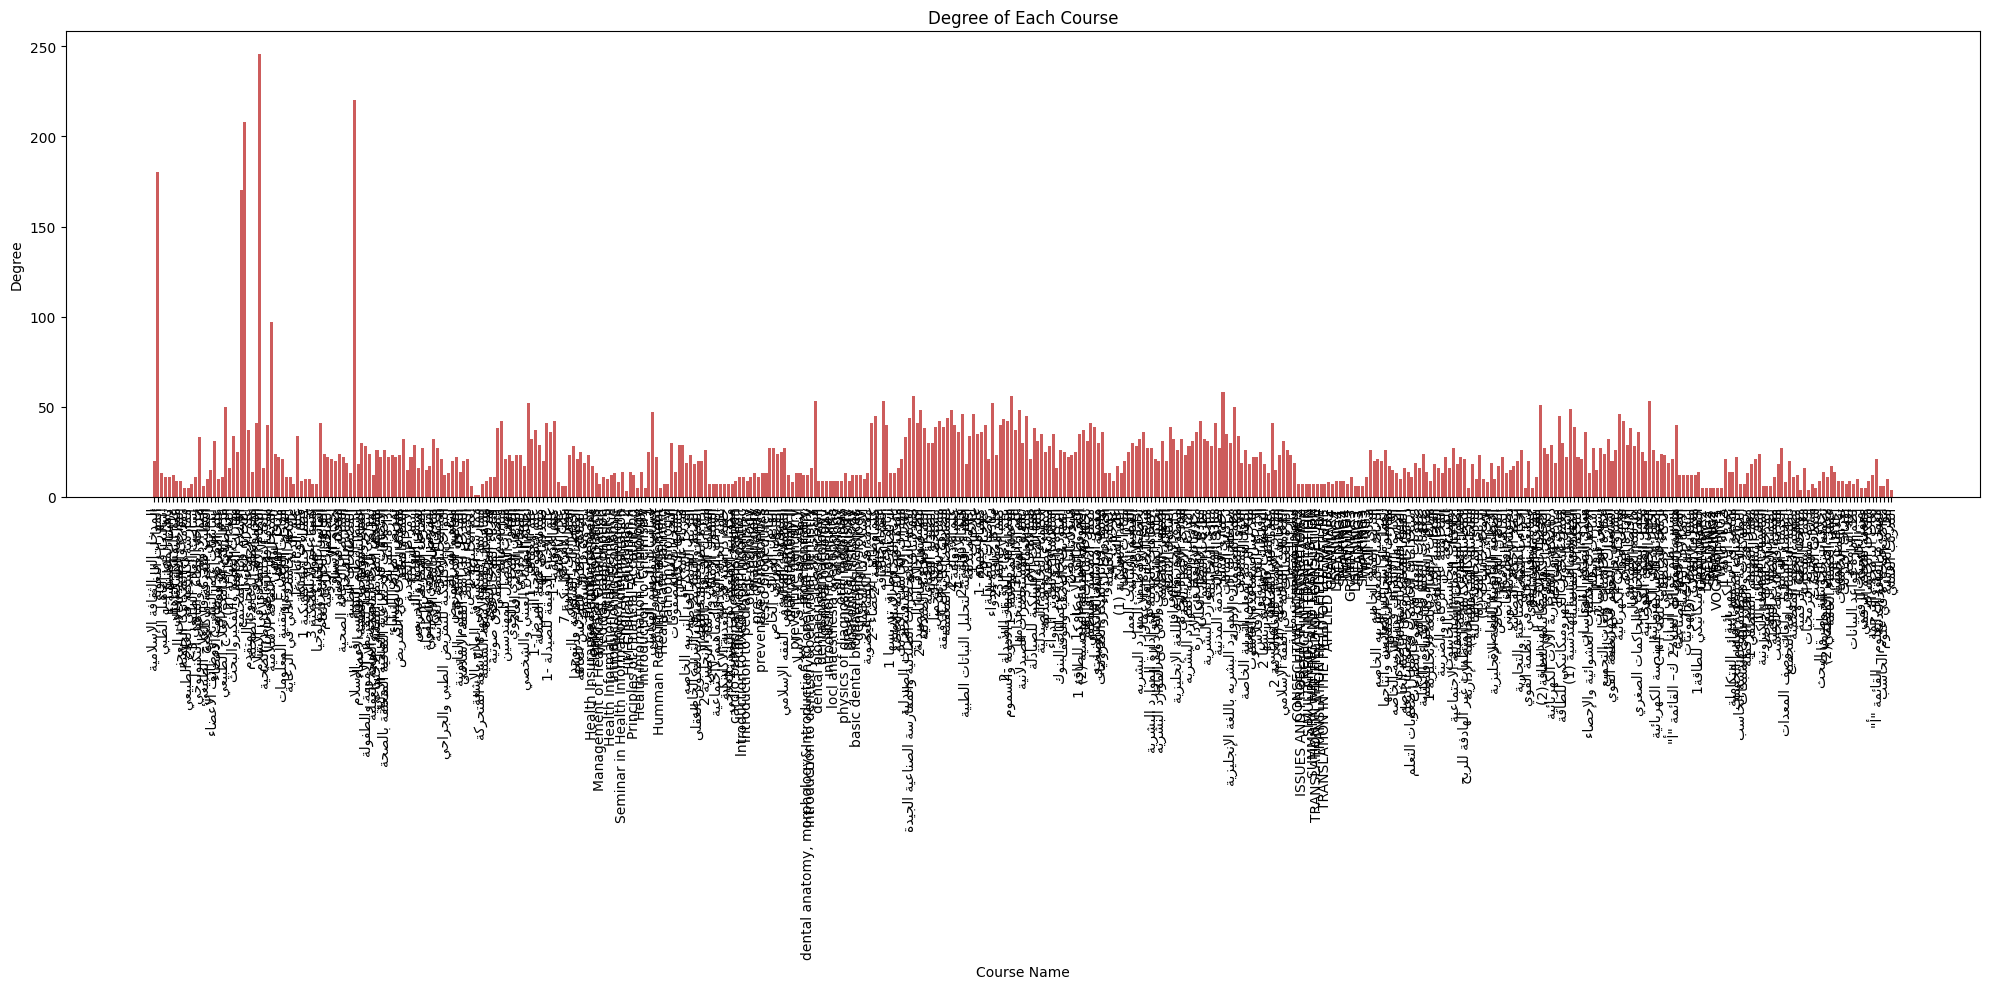

In [83]:
# Degree of each course
plt.figure(figsize=(20, 10))
courses = list(degree_dict.keys())
degrees = list(degree_dict.values())
reshaped_labels = [get_display(arabic_reshaper.reshape(course)) for course in courses]
plt.bar(reshaped_labels, degrees, color='indianred')
plt.title('Degree of Each Course')
plt.xlabel('Course Name')
plt.ylabel('Degree')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [84]:
# Apply and compare coloring algorithms
coloring_results = [] # Initialize a list to store results

# 1. Greedy Coloring (Largest First)
start_time = time.time() # gives the current time in seconds

greedy_colors = nx.coloring.greedy_color(G, strategy='largest_first') #colors the nodes with the highest degree (most neighbors) first.

greedy_time = time.time() - start_time
greedy_num_colors = len(set(greedy_colors.values())) #greedy_colors is a dictionary where keys are nodes (courses), and values are the colors assigned to each node
coloring_results.append({ # it appends this dictionary to the coloring_results list.
    'Algorithm': 'Greedy (Largest First)',
    'Time (s)': greedy_time,
    'Number of Periods': greedy_num_colors
})

# 2. Greedy Coloring (Random Sequential)
start_time = time.time()
random_colors = nx.coloring.greedy_color(G, strategy='random_sequential')
random_time = time.time() - start_time
random_num_colors = len(set(random_colors.values()))
coloring_results.append({
    'Algorithm': 'Greedy (Random Sequential)',
    'Time (s)': random_time,
    'Number of Periods': random_num_colors
})

# 3. Greedy Coloring (Smallest Last) - Handle potential failure
#try: # this means if any error happens in the next lines, the code won't crash — it’ll go to the except part.
start_time = time.time()
smallest_colors = nx.coloring.greedy_color(G, strategy='smallest_last')
smallest_time = time.time() - start_time
smallest_num_colors = len(set(smallest_colors.values()))
coloring_results.append({
        'Algorithm': 'Greedy (Smallest Last)',
        'Time (s)': smallest_time,
        'Number of Periods': smallest_num_colors
    })
#except Exception as e:
 #   print(f"Error in Smallest Last strategy: {e}")
#coloring_results.append({
       # 'Algorithm': 'Greedy (Smallest Last)',
        #'Time (s)': None,
        #'Number of Periods': None
   # })

In [85]:
# Compare results
results_df = pd.DataFrame(coloring_results)
print("\nComparison of Coloring Algorithms:")
print(results_df)



Comparison of Coloring Algorithms:
                    Algorithm  Time (s)  Number of Periods
0      Greedy (Largest First)  0.000000                 20
1  Greedy (Random Sequential)  0.000000                 25
2      Greedy (Smallest Last)  0.019905                 21


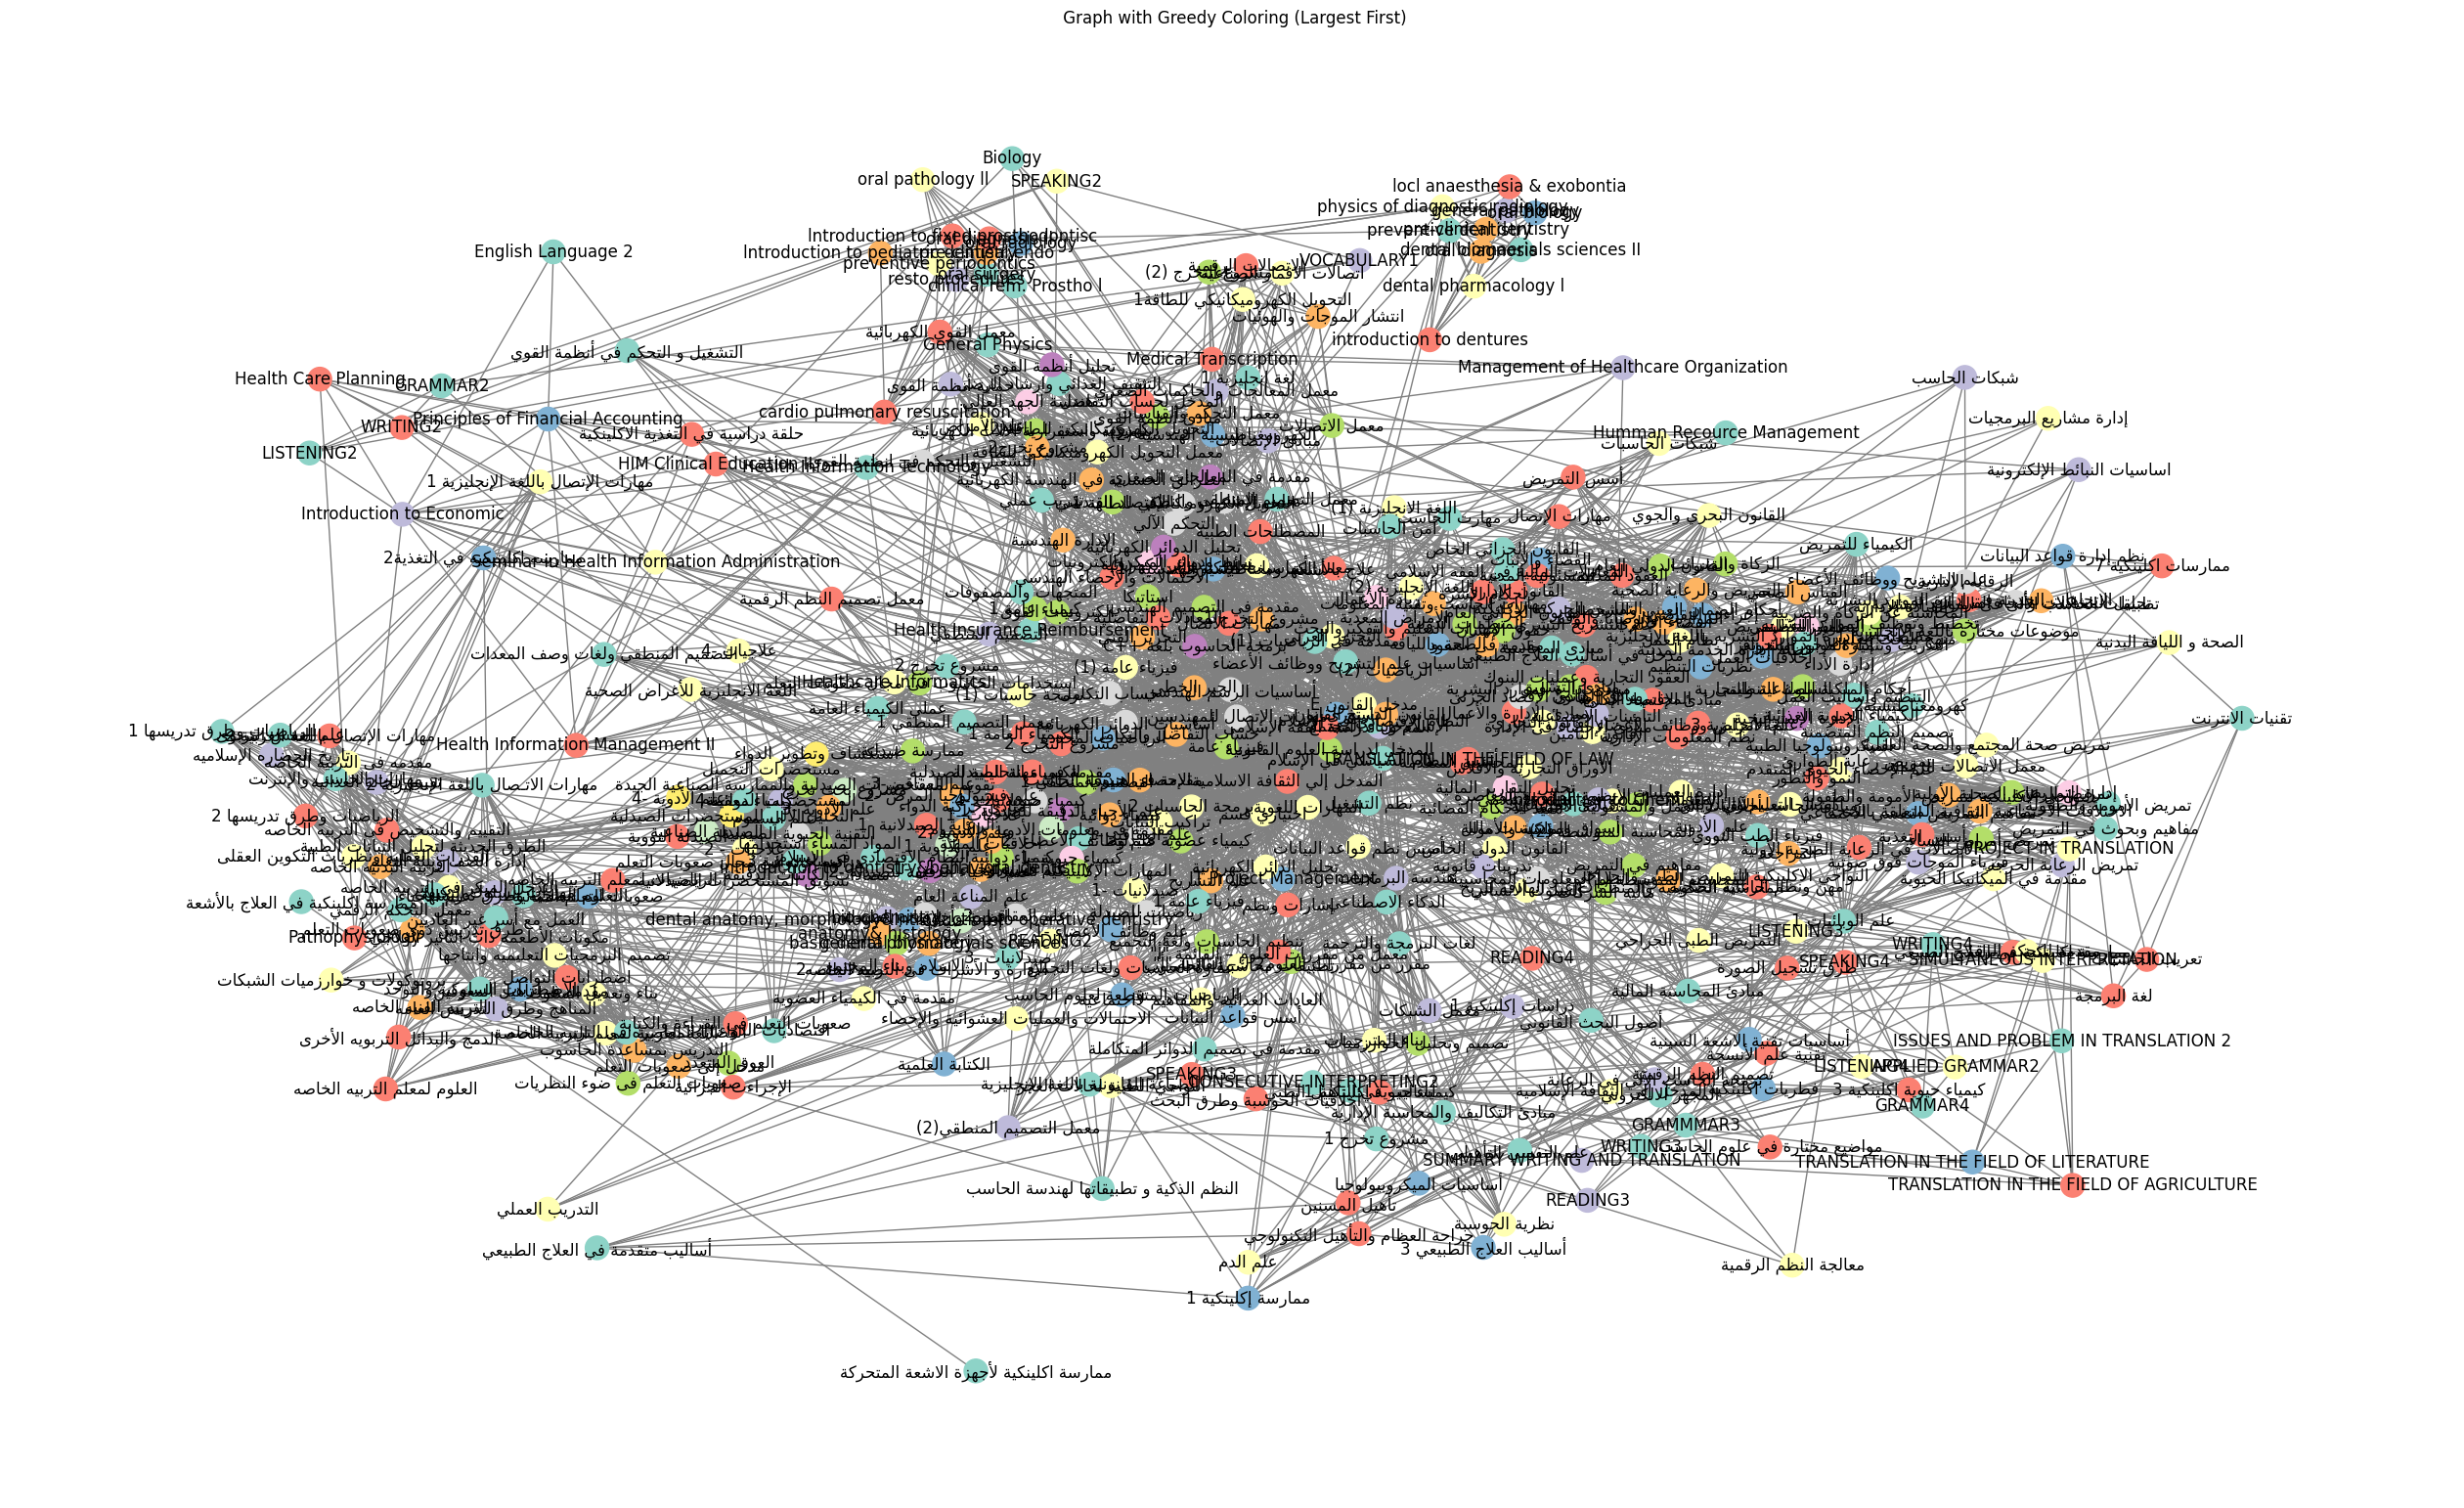

In [86]:
# Visualize the coloring (using Greedy Largest First)
plt.figure(figsize=(25, 15))
pos = nx.spring_layout(G, k=0.6) #k=0.5 controls the spacing
node_colors = [greedy_colors[node] for node in G.nodes()]
nx.draw(G, pos, with_labels=False, node_color=node_colors, cmap=plt.cm.Set3 , edge_color='gray')
labels = {node: get_display(arabic_reshaper.reshape(node)) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels)
6
plt.title(" Graph with Greedy Coloring (Largest First)")
plt.show()

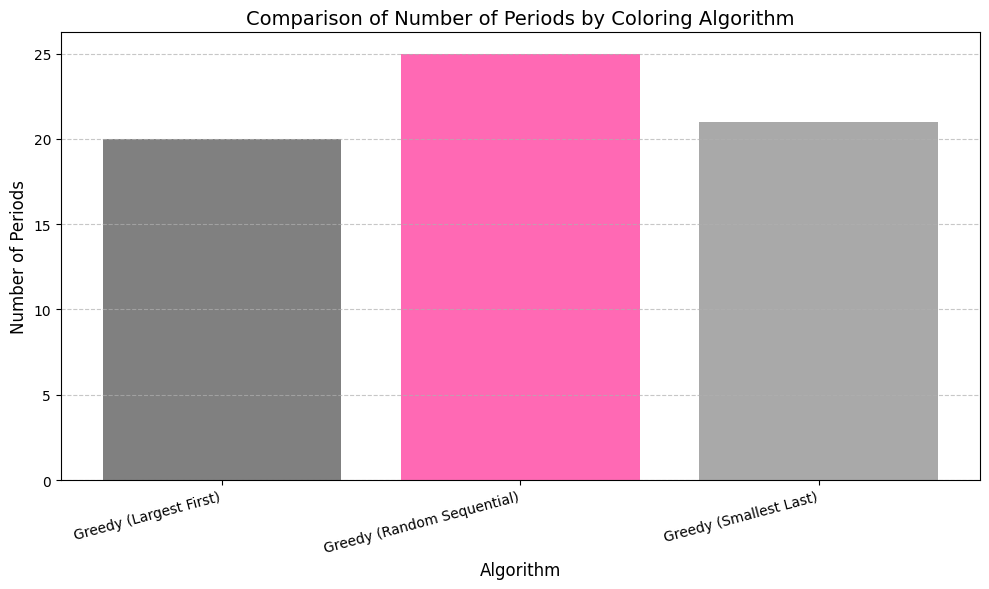

In [87]:

# Extract data for plotting
algorithms = [result['Algorithm'] for result in coloring_results]
num_periods = [result['Number of Periods'] for result in coloring_results]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(algorithms, num_periods, color=['gray', 'hotpink', 'darkgray'])
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Number of Periods', fontsize=12)
plt.title('Comparison of Number of Periods by Coloring Algorithm', fontsize=14)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

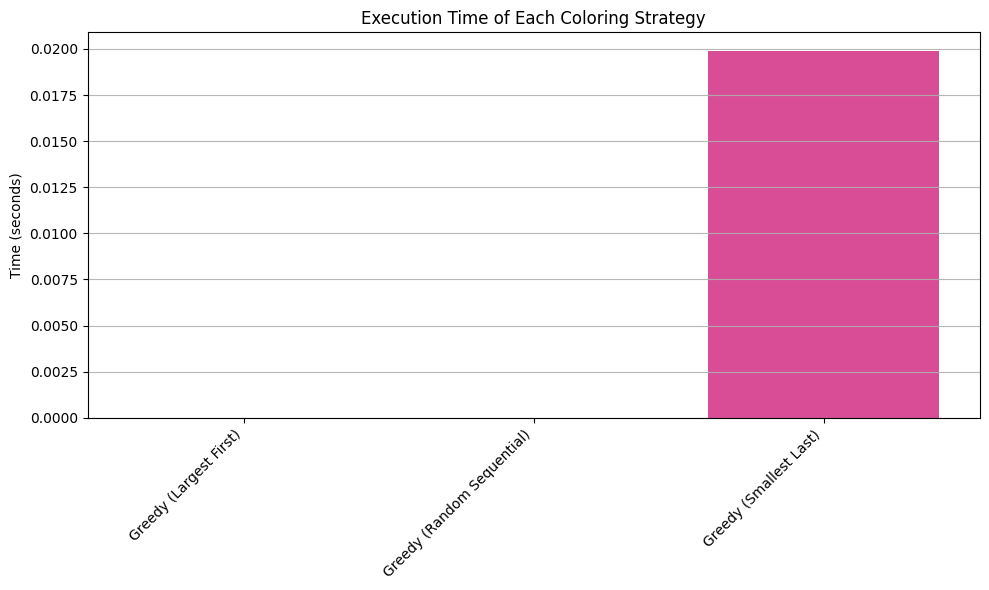

In [88]:
#Visualize elapsed time for each coloring strategy
plt.figure(figsize=(10, 6))
# Replace None values with 0 for plotting
times = results_df['Time (s)']
# Create a bar plot with algorithm names as x-axis
plt.bar(results_df['Algorithm'], times, color='#d94d96')
# Set plot title and labels
plt.title('Execution Time of Each Coloring Strategy')
plt.ylabel('Time (seconds)')
# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
# Add a grid on the y-axis
plt.grid(axis='y', alpha=0.9)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Display the plot
plt.show()

In [89]:
from py2neo import Graph, Node, Relationship

neo4j_graph = Graph("bolt://localhost:7687", auth=("neo4j", "m12345678"))


neo4j_graph.delete_all()


for node in G.nodes():
    neo4j_graph.merge(Node("Course", name=node), "Course", "name")

for u, v, data in G.edges(data=True):
    course1 = Node("Course", name=u)
    course2 = Node("Course", name=v)
    rel = Relationship(course1, "SHARES_STUDENT", course2, weight=data['weight'])
    neo4j_graph.create(rel)
